In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading in the data
companies = pd.read_csv('companies.csv',sep=';')

In [3]:
# surveying
companies.head()

,Name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,permalink
0,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,05/01/2015,05/01/2015,/organization/-fame
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,04/09/2014,01/03/2014,14/10/2014,/organization/-qounter
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,30/01/2014,30/01/2014,/organization/-the-one-of-them-inc-
3,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,01/01/2007,19/03/2008,19/03/2008,/organization/0-6-com
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,01/01/2010,24/07/2014,24/07/2014,/organization/004-technologies


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               63214 non-null  object
 1   homepage_url       59069 non-null  object
 2   category_list      63215 non-null  object
 3   funding_total_usd  63215 non-null  object
 4   status             63215 non-null  object
 5   country_code       57799 non-null  object
 6   state_code         56263 non-null  object
 7   region             56760 non-null  object
 8   city               56762 non-null  object
 9   funding_rounds     63215 non-null  int64 
 10  founded_at         49707 non-null  object
 11  first_funding_at   63192 non-null  object
 12  last_funding_at    63215 non-null  object
 13  permalink          63215 non-null  object
dtypes: int64(1), object(13)
memory usage: 6.8+ MB


In [5]:
companies.isna().sum()

Name                     1
homepage_url          4146
category_list            0
funding_total_usd        0
status                   0
country_code          5416
state_code            6952
region                6455
city                  6453
funding_rounds           0
founded_at           13508
first_funding_at        23
last_funding_at          0
permalink                0
dtype: int64

In [5]:
# checking the row with a missing name
companies[companies['Name'].isna()]

,Name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,permalink
54191,NaN,http://tellitin10.com,Startups,25000,closed,USA,OR,"Portland, Oregon",Portland,1,01/10/2011,01/03/2012,01/03/2012,/organization/tell-it-in


In [6]:
# just drop that one row
companies = companies.dropna(subset='Name')

In [7]:
# row is gone
companies.shape

(63214, 14)

In [8]:
# I can impute missing URLs by just filling them in with companyname.com
# first add unformatted name column for use in creating URLs
companies['name_unformatted'] = companies['Name']

for i in companies[companies['homepage_url'].isna()].index:
    companies.at[i, 'name_unformatted'] = str(companies['name_unformatted'][i]).lower().replace(' ', '')
    if not companies['name_unformatted'][i].isalnum():
        for char in companies['name_unformatted'][i]:
            if not char.isalnum():
                companies.at[i, 'name_unformatted'] = companies['name_unformatted'][i].replace(char, '')

In [9]:
# create URLs using unformatted names for rows with null values

for i in companies[companies['homepage_url'].isna()].index:
    companies.at[i, 'homepage_url'] = f'{companies["name_unformatted"][i]}.com'

In [10]:
# nulls are gone
companies['homepage_url'].isna().sum()

0

In [12]:
# double checking a specific instance
companies['homepage_url'][10]

'14all.com'

In [13]:
# should I create a new column that indicates that these rows' websites are made up? I might need to if I'm going to create a new status column based off of it

In [11]:
# checking for rows where all of the location columns are null
companies[['country_code', 'state_code', 'region', 'city']].dropna(how='all') # 57798 rows left, 5416 rows with all null

,country_code,state_code,region,city
0,IND,16,Mumbai,Mumbai
1,USA,DE,DE - Other,Delaware City
3,CHN,22,Beijing,Beijing
4,USA,IL,"Springfield, Illinois",Champaign
5,HKG,NaN,Hong Kong,Hong Kong
...,...,...,...,...
63209,AUT,3,Vienna,Gerasdorf Bei Wien
63210,GBR,H9,London,London
63211,CHN,22,Beijing,Beijing
63212,HRV,15,Split,Split


In [12]:
# this is the same number as the total amount of nulls for country_code, probably these rows coincide
# I will drop the state_code, region, and city columns and then drop the rows where country_code is null
companies.drop(columns=['state_code', 'region', 'city'], inplace=True)

In [13]:
companies.dropna(subset='country_code', inplace=True)

In [14]:
companies.head()

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,permalink,name_unformatted
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,NaN,05/01/2015,05/01/2015,/organization/-fame,#fame
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,04/09/2014,01/03/2014,14/10/2014,/organization/-qounter,:Qounter
3,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,01/01/2007,19/03/2008,19/03/2008,/organization/0-6-com,0-6.com
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,1,01/01/2010,24/07/2014,24/07/2014,/organization/004-technologies,004 Technologies
5,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,NaN,01/07/2014,01/07/2014,/organization/01games-technology,01Games Technology


In [16]:
# resetting the index since dropping a lot of rows messed it up
companies = companies.reset_index(drop=True)

In [17]:
# I can also get rid of the permalink and name_unformatted columns
companies.drop(columns=['permalink', 'name_unformatted'], inplace=True)

In [18]:
companies.isna().sum()

Name                     0
homepage_url             0
category_list            0
funding_total_usd        0
status                   0
country_code             0
funding_rounds           0
founded_at           11275
first_funding_at        22
last_funding_at          0
dtype: int64

In [19]:
# check if founded_at and first_funding_at dates coincide at all for most companies
# if so then impute missing values for founded_at from first_funding_at and vice versa
# but first make date columns datetime types
companies.info() # currently they are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57798 entries, 0 to 57797
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               57798 non-null  object
 1   homepage_url       57798 non-null  object
 2   category_list      57798 non-null  object
 3   funding_total_usd  57798 non-null  object
 4   status             57798 non-null  object
 5   country_code       57798 non-null  object
 6   funding_rounds     57798 non-null  int64 
 7   founded_at         46523 non-null  object
 8   first_funding_at   57776 non-null  object
 9   last_funding_at    57798 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.4+ MB


In [ ]:
# I ran all the subsequent cells in the process of figuring out how to change the column to datetime
# they are commented out because they all returned errors and I wanted to be able to run all cells in the notebook automatically

In [22]:
#companies['founded_at'] = pd.to_datetime(companies['founded_at'])

In [23]:
#companies['founded_at'] = pd.to_datetime(companies['founded_at'], dayfirst=True)

In [24]:
#companies['founded_at'] = pd.to_datetime(companies['founded_at'], format='ISO8601')

In [25]:
#companies['founded_at'] = pd.to_datetime(companies['founded_at'], format='mixed')

In [20]:
companies[companies['founded_at'] == '1636-09-08']

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
21741,Harvard University,http://harvard.edu,Colleges|Education|Universities,90000000,operating,USA,1,1636-09-08,06/01/2014,06/01/2014


In [21]:
companies.shape

(57798, 10)

In [22]:
companies.drop(21741, inplace=True)

In [23]:
companies.shape

(57797, 10)

In [24]:
# let's try running the datetime cell again
companies['founded_at'] = pd.to_datetime(companies['founded_at'], format='mixed')

In [25]:
companies.info() # success!

<class 'pandas.core.frame.DataFrame'>
Index: 57797 entries, 0 to 57797
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               57797 non-null  object        
 1   homepage_url       57797 non-null  object        
 2   category_list      57797 non-null  object        
 3   funding_total_usd  57797 non-null  object        
 4   status             57797 non-null  object        
 5   country_code       57797 non-null  object        
 6   funding_rounds     57797 non-null  int64         
 7   founded_at         46522 non-null  datetime64[ns]
 8   first_funding_at   57775 non-null  object        
 9   last_funding_at    57797 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 4.9+ MB


In [26]:
companies.head() # nan changed to NaT

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,NaT,05/01/2015,05/01/2015
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09,01/03/2014,14/10/2014
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01,19/03/2008,19/03/2008
3,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,1,2010-01-01,24/07/2014,24/07/2014
4,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,NaT,01/07/2014,01/07/2014


In [27]:
# let's try the same for first_funding_at
#companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [28]:
companies.loc[6527]

Name                                                  Blaze Bioscience
homepage_url                            http://www.blazebioscience.com
category_list        Biotechnology|Health Care|Health Care Informat...
funding_total_usd                                             32936998
status                                                       operating
country_code                                                       USA
funding_rounds                                                       5
founded_at                                         2010-01-01 00:00:00
first_funding_at                                            1532-06-26
last_funding_at                                             03/12/2013
Name: 6527, dtype: object

In [29]:
companies[companies['first_funding_at'] == '1532-06-26']

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
6527,Blaze Bioscience,http://www.blazebioscience.com,Biotechnology|Health Care|Health Care Informat...,32936998,operating,USA,5,2010-01-01,1532-06-26,03/12/2013


In [30]:
# this is clearly an erroneous date, but it's a real company so I don't want to drop the row. I'll change this value to nan
companies.at[6527, 'first_funding_at'] = np.nan

In [31]:
companies.loc[6527] # it's been changed

Name                                                  Blaze Bioscience
homepage_url                            http://www.blazebioscience.com
category_list        Biotechnology|Health Care|Health Care Informat...
funding_total_usd                                             32936998
status                                                       operating
country_code                                                       USA
funding_rounds                                                       5
founded_at                                         2010-01-01 00:00:00
first_funding_at                                                   NaN
last_funding_at                                             03/12/2013
Name: 6527, dtype: object

In [32]:
# try again
#companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [33]:
companies.loc[19467]

Name                                                         Gamewheel
homepage_url                                       http://gamewheel.co
category_list        Brand Marketing|Game|Mobile Advertising|Social...
funding_total_usd                                                    -
status                                                       operating
country_code                                                       DEU
funding_rounds                                                       2
founded_at                                                         NaT
first_funding_at                                            1201-11-23
last_funding_at                                             03/12/2014
Name: 19467, dtype: object

In [34]:
companies[companies['first_funding_at'] == '1201-11-23']

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
19467,Gamewheel,http://gamewheel.co,Brand Marketing|Game|Mobile Advertising|Social...,-,operating,DEU,2,NaT,1201-11-23,03/12/2014


In [35]:
# this also seems like a mess up, change it to nan as well
companies.at[19467, 'first_funding_at'] = np.nan

In [36]:
companies.loc[19467]

Name                                                         Gamewheel
homepage_url                                       http://gamewheel.co
category_list        Brand Marketing|Game|Mobile Advertising|Social...
funding_total_usd                                                    -
status                                                       operating
country_code                                                       DEU
funding_rounds                                                       2
founded_at                                                         NaT
first_funding_at                                                   NaN
last_funding_at                                             03/12/2014
Name: 19467, dtype: object

In [37]:
# and again
#companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [38]:
companies.loc[32433] # this doesn't seem right...

Name                                 MouseHouseApp
homepage_url         http://www.mousehouseapp.com/
category_list          Apps|Life Sciences|Software
funding_total_usd                                -
status                                   operating
country_code                                   USA
funding_rounds                                   1
founded_at                     2011-01-01 00:00:00
first_funding_at                        10/10/2014
last_funding_at                         10/10/2014
Name: 32433, dtype: object

In [39]:
companies[companies['first_funding_at'] == '1014-03-01'] # apparently the index was off in the error message

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
32434,Mousera,http://www.mousera.com,Biotechnology,29940004,operating,USA,3,2013-01-01,1014-03-01,09/06/2015


In [40]:
companies.loc[32434]

Name                                Mousera
homepage_url         http://www.mousera.com
category_list                 Biotechnology
funding_total_usd                  29940004
status                            operating
country_code                            USA
funding_rounds                            3
founded_at              2013-01-01 00:00:00
first_funding_at                 1014-03-01
last_funding_at                  09/06/2015
Name: 32434, dtype: object

In [41]:
# change this to nan as well
companies.at[32434, 'first_funding_at'] = np.nan

In [42]:
# and again
companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], format='mixed')

In [43]:
companies.info() # finally

<class 'pandas.core.frame.DataFrame'>
Index: 57797 entries, 0 to 57797
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               57797 non-null  object        
 1   homepage_url       57797 non-null  object        
 2   category_list      57797 non-null  object        
 3   funding_total_usd  57797 non-null  object        
 4   status             57797 non-null  object        
 5   country_code       57797 non-null  object        
 6   funding_rounds     57797 non-null  int64         
 7   founded_at         46522 non-null  datetime64[ns]
 8   first_funding_at   57772 non-null  datetime64[ns]
 9   last_funding_at    57797 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 6.9+ MB


In [44]:
# for last_funding_at now
companies['last_funding_at'] = pd.to_datetime(companies['last_funding_at'], format='mixed')

In [45]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57797 entries, 0 to 57797
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               57797 non-null  object        
 1   homepage_url       57797 non-null  object        
 2   category_list      57797 non-null  object        
 3   funding_total_usd  57797 non-null  object        
 4   status             57797 non-null  object        
 5   country_code       57797 non-null  object        
 6   funding_rounds     57797 non-null  int64         
 7   founded_at         46522 non-null  datetime64[ns]
 8   first_funding_at   57772 non-null  datetime64[ns]
 9   last_funding_at    57797 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 6.9+ MB


In [46]:
# now that all date columns are datetime types, I can see if founded_at and first_funding_at are usually similar
companies.head()

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,NaT,2015-05-01,2015-05-01
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09,2014-01-03,2014-10-14
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19
3,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,1,2010-01-01,2014-07-24,2014-07-24
4,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,NaT,2014-01-07,2014-01-07


In [47]:
# testing on index 1
companies['founded_at'][1] - companies['first_funding_at'][1]

Timedelta('96 days 00:00:00')

In [48]:
# that works so I'll get the average timedelta for non null values in these columns
nonnull = companies[companies['founded_at'].notna() & companies['first_funding_at'].notna()]

In [49]:
nonnull.shape

(46501, 10)

In [50]:
(np.abs(nonnull['founded_at'] - nonnull['first_funding_at'])).mean() # average timedelta is 1435 days or about 4 years

Timedelta('1435 days 13:56:15.953205312')

In [51]:
# it doesn't seem like I can accurately impute founded_at from first_funding_at directly, but I can offset by the averge timedelta amount
# I first need to see which direction the time delta tends to go in 
differences = nonnull['founded_at'] - nonnull['first_funding_at']
differences

1          96 days
2        -443 days
3       -1665 days
5       -4695 days
6        -790 days
           ...    
57790   -5113 days
57793   -2220 days
57794     -55 days
57796     488 days
57797    -365 days
Length: 46501, dtype: timedelta64[ns]

In [52]:
differences = differences.reset_index(drop=True)
differences

0          96 days
1        -443 days
2       -1665 days
3       -4695 days
4        -790 days
           ...    
46496   -5113 days
46497   -2220 days
46498     -55 days
46499     488 days
46500    -365 days
Length: 46501, dtype: timedelta64[ns]

In [53]:
zero_delta = pd.to_timedelta(0)
zero_delta

Timedelta('0 days 00:00:00')

In [54]:
differences[0] > zero_delta

True

In [55]:
differences[1] > zero_delta

False

In [56]:
differences > zero_delta

0         True
1        False
2        False
3        False
4        False
         ...  
46496    False
46497    False
46498    False
46499     True
46500    False
Length: 46501, dtype: bool

In [57]:
(differences == zero_delta).sum() # 2578 rows have the same dates for founded_at and first_funding_at

2578

In [60]:
(differences > zero_delta).sum() # 3908 rows have a later founded_at date than first_funding_at date (this seems weird - maybe I should change these)

3908

In [61]:
(differences < zero_delta).sum() # 40015 rows have an earlier founded_at date than first_funding_at date

40015

In [62]:
# finding the average difference in time for rows where there's an earlier founded_at date than first_funding_at date
timedelta = (np.abs(differences[differences < zero_delta])).mean()
timedelta

Timedelta('1639 days 08:55:39.547669648')

In [63]:
# so I'll make the null founded_at values equal to the first_funding_at date - timedelta
# first I need to get rid of the rows where both founded_at and first_funding_at are missing
companies.isna().sum()

Name                     0
homepage_url             0
category_list            0
funding_total_usd        0
status                   0
country_code             0
funding_rounds           0
founded_at           11275
first_funding_at        25
last_funding_at          0
dtype: int64

In [64]:
companies.shape

(57797, 10)

In [66]:
companies.dropna(subset=['founded_at', 'first_funding_at'], how='all') # we'd only lose four rows

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,NaT,2015-05-01,2015-05-01
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09,2014-01-03,2014-10-14
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19
3,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,1,2010-01-01,2014-07-24,2014-07-24
4,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,NaT,2014-01-07,2014-01-07
...,...,...,...,...,...,...,...,...,...,...
57793,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,1,2007-01-01,2013-01-29,2013-01-29
57794,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000,operating,GBR,3,2014-01-28,2014-03-24,2015-02-25
57795,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,1,NaT,2012-01-04,2012-01-04
57796,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,4,2012-05-13,2011-01-11,2014-01-03


In [67]:
companies.dropna(subset=['founded_at', 'first_funding_at'], how='all', inplace=True)

In [68]:
companies.shape # those four rows are gone

(57793, 10)

In [71]:
# resetting the index again to account for dropped rows
companies = companies.reset_index(drop=True)

In [69]:
# testing that this would work 
type(companies['founded_at'][0]) == pd._libs.tslibs.nattype.NaTType

True

In [72]:
# imputing the values now
for i in range(len(companies['founded_at'])):
    if type(companies.at[i, 'founded_at']) == pd._libs.tslibs.nattype.NaTType:
        companies.at[i, 'founded_at'] = companies.at[i, 'first_funding_at'] - timedelta

In [73]:
# only the first_funding_at column has any nulls now
companies.isna().sum()

Name                  0
homepage_url          0
category_list         0
funding_total_usd     0
status                0
country_code          0
funding_rounds        0
founded_at            0
first_funding_at     21
last_funding_at       0
dtype: int64

In [74]:
companies = companies.reset_index(drop=True)

In [75]:
# imputing those values from founded_at column by adding in the timedelta
for i in range(len(companies['first_funding_at'])):
    if type(companies.at[i, 'first_funding_at']) == pd._libs.tslibs.nattype.NaTType:
        companies.at[i, 'first_funding_at'] = companies.at[i, 'founded_at'] + timedelta

In [76]:
companies.isna().sum()

Name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [77]:
# there are no more nulls to deal with
# but there are other issues
# first quickly check for duplicates
companies.duplicated().sum() # we're good here

0

In [78]:
# I can see that there's a row with a '-' in the funding_total_usd column
companies.head() 

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,2010-11-03 15:04:20.452330352,2015-05-01,2015-05-01
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09 00:00:00.000000000,2014-01-03,2014-10-14
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19
3,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24
4,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,2009-07-12 15:04:20.452330352,2014-01-07,2014-01-07


In [79]:
# and the row is of type object not int64
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               57793 non-null  object        
 1   homepage_url       57793 non-null  object        
 2   category_list      57793 non-null  object        
 3   funding_total_usd  57793 non-null  object        
 4   status             57793 non-null  object        
 5   country_code       57793 non-null  object        
 6   funding_rounds     57793 non-null  int64         
 7   founded_at         57793 non-null  datetime64[ns]
 8   first_funding_at   57793 non-null  datetime64[ns]
 9   last_funding_at    57793 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 4.4+ MB


In [80]:
# how many rows are there with a '-'
companies[companies['funding_total_usd'] == '-'].shape # there are 9360 rows with a '-'

(9360, 10)

In [83]:
# this is a lot of rows to drop, but I will for now since it doesn't make sense to impute values for a target column
# first get the indeces for the rows I want to drop
dash_index = companies[companies['funding_total_usd'] == '-'].index

In [84]:
companies.drop(labels=dash_index)

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,2010-11-03 15:04:20.452330352,2015-05-01,2015-05-01
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09 00:00:00.000000000,2014-01-03,2014-10-14
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19
4,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,2009-07-12 15:04:20.452330352,2014-01-07,2014-01-07
5,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,2,1997-01-01 00:00:00.000000000,2009-11-09,2009-12-21
...,...,...,...,...,...,...,...,...,...,...
57788,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,1,2007-01-01 00:00:00.000000000,2013-01-29,2013-01-29
57789,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000,operating,GBR,3,2014-01-28 00:00:00.000000000,2014-03-24,2015-02-25
57790,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,1,2007-07-09 15:04:20.452330352,2012-01-04,2012-01-04
57791,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,4,2012-05-13 00:00:00.000000000,2011-01-11,2014-01-03


In [86]:
# this looks right, 9360 columns have been dropped, so I'll set inplace equal to True
companies.drop(labels=dash_index, inplace=True)

In [87]:
companies.head()

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,2010-11-03 15:04:20.452330352,2015-05-01,2015-05-01
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09 00:00:00.000000000,2014-01-03,2014-10-14
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19
4,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,2009-07-12 15:04:20.452330352,2014-01-07,2014-01-07
5,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,2,1997-01-01 00:00:00.000000000,2009-11-09,2009-12-21


In [88]:
# need to reset index again
companies = companies.reset_index(drop=True)

In [89]:
companies.head()

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,1,2010-11-03 15:04:20.452330352,2015-05-01,2015-05-01
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,2,2014-04-09 00:00:00.000000000,2014-01-03,2014-10-14
2,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19
3,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,1,2009-07-12 15:04:20.452330352,2014-01-07,2014-01-07
4,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,2,1997-01-01 00:00:00.000000000,2009-11-09,2009-12-21


In [90]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48433 entries, 0 to 48432
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               48433 non-null  object        
 1   homepage_url       48433 non-null  object        
 2   category_list      48433 non-null  object        
 3   funding_total_usd  48433 non-null  object        
 4   status             48433 non-null  object        
 5   country_code       48433 non-null  object        
 6   funding_rounds     48433 non-null  int64         
 7   founded_at         48433 non-null  datetime64[ns]
 8   first_funding_at   48433 non-null  datetime64[ns]
 9   last_funding_at    48433 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 3.7+ MB


In [92]:
# I just need to change the type of the column now
companies['funding_total_usd'] = companies['funding_total_usd'].astype(float)

In [93]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48433 entries, 0 to 48432
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               48433 non-null  object        
 1   homepage_url       48433 non-null  object        
 2   category_list      48433 non-null  object        
 3   funding_total_usd  48433 non-null  float64       
 4   status             48433 non-null  object        
 5   country_code       48433 non-null  object        
 6   funding_rounds     48433 non-null  int64         
 7   founded_at         48433 non-null  datetime64[ns]
 8   first_funding_at   48433 non-null  datetime64[ns]
 9   last_funding_at    48433 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [94]:
# everything looks pretty good now
# on to some EDA
companies['status'].value_counts() # pretty skewed

status
operating    38769
acquired      4575
closed        3682
ipo           1407
Name: count, dtype: int64

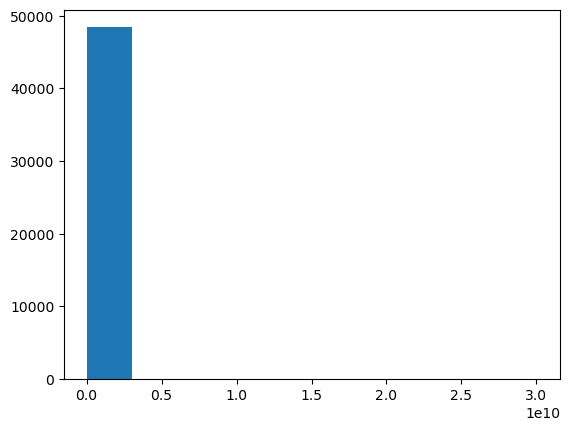

In [103]:
# how is funding_total_usd distributed
plt.figure()
plt.hist(companies['funding_total_usd'])
plt.show()

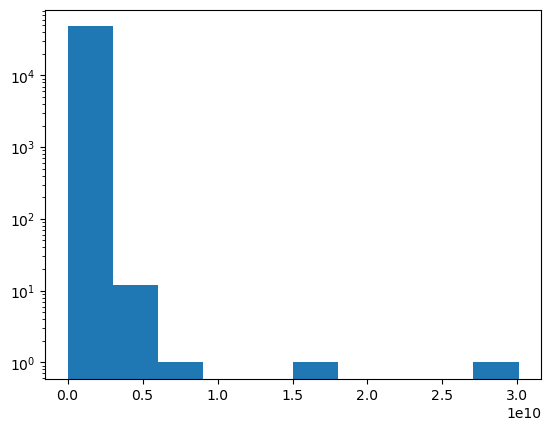

In [104]:
# that was totally not informative, what about with log scale
plt.figure()
plt.hist(companies['funding_total_usd'], log=True)
plt.show()

In [105]:
# still not very informative
companies['funding_total_usd'].describe()

count    4.843300e+04
mean     1.914237e+07
std      1.898265e+08
min      1.000000e+00
25%      4.000000e+05
50%      2.110800e+06
75%      1.059986e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [108]:
# the smallest funding amount is $1 and largest is $30,000,000,000 which is a pretty ridiculous range
# which company raised 30 billion?
companies[companies['funding_total_usd'] > 30000000000 ]

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
44912,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,3.007950e+10,ipo,USA,5,1983-07-10,2010-01-26,2014-02-28


In [109]:
# it's verizon which actually makes sense, but probably doesn't count as a startup
# what other companies are there here with huge funding totals?
# filtering for over 1B
companies[companies['funding_total_usd'] > 1000000000 ] # there are 61

,Name,homepage_url,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at
1551,Airbnb,http://airbnb.com,Hotels|Travel,2.394820e+09,operating,USA,8,2008-01-08,2009-01-01,2015-11-20
1800,Alibaba,http://www.alibaba.com,E-Commerce,4.812000e+09,ipo,CHN,7,1999-01-06,1999-01-10,2014-01-04
2437,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,1.176830e+09,operating,IND,7,2010-03-12,2011-04-21,2015-11-17
3868,Avant,http://www.avant.com,Analytics|Big Data|FinTech|Machine Learning|We...,1.729000e+09,operating,USA,10,2012-01-11,2013-08-05,2015-09-29
3962,Avito.ru,http://www.avito.ru,Advertising|Classifieds,1.342000e+09,acquired,RUS,5,2008-01-01,2011-05-30,2015-10-23
...,...,...,...,...,...,...,...,...,...,...
46452,WeWork,http://www.wework.com,Collaboration|Coworking|Real Estate|Social Med...,1.002784e+09,operating,USA,6,2010-02-15,2012-01-30,2015-06-25
47254,Xerox,http://www.xerox.com,Hardware + Software,1.100000e+09,ipo,USA,1,1906-01-01,2012-03-15,2012-03-15
47278,Xiaomi,http://www.mi.com,Consumer Electronics|Mobile,1.447000e+09,operating,CHN,6,2010-04-04,2010-01-12,2015-04-27
47706,Youku,http://www.youku.com,Broadcasting|Photography|Technology,1.320000e+09,acquired,CHN,6,2006-12-21,2006-01-03,2014-04-28
